In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("notebook")
sns.set_style("ticks")

import pandas as pd

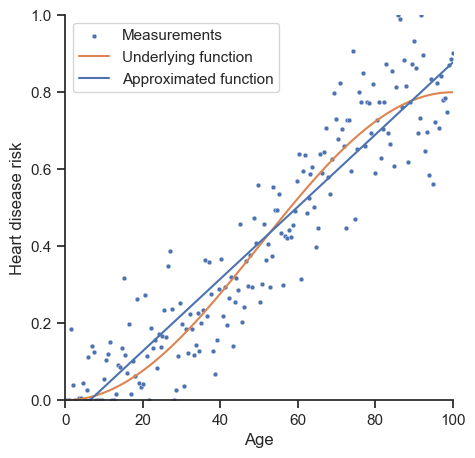

In [241]:
def underlying_f(x):
    y = -(np.cos(np.pi * 1/100 * x) - 1) / 2 * 0.8
    return y

colors = sns.color_palette()

N = 200
xs_all = np.linspace(0, 100, N)
ys_all = underlying_f(xs_all) + np.random.normal(0, 0.1, N)
ys_all = np.clip(ys_all, 0, 1)

plot_df = pd.DataFrame({'Age': xs_all, 'Heart disease risk': ys_all, 'Underlying function': underlying_f(xs_all)})
sns.scatterplot(x='Age', y='Heart disease risk', data=plot_df, label='Measurements', color=colors[0], s=12)
sns.lineplot(x='Age', y='Underlying function', data=plot_df, label='Underlying function', color=colors[1])

# plot approximated function
coefs = np.polyfit(xs_all, ys_all, 1)
xs = np.linspace(0, 100, 100)
ys = np.polyval(coefs, xs)
sns.lineplot(x=xs, y=ys, label='Approximated function', color=colors[0])
plt.ylim(0, 1)
sns.despine()

# set figure size to square
fig = plt.gcf()
fig.set_size_inches(5, 5)

plt.savefig('../images/3/heart_disease_risk.pdf', bbox_inches='tight')

794


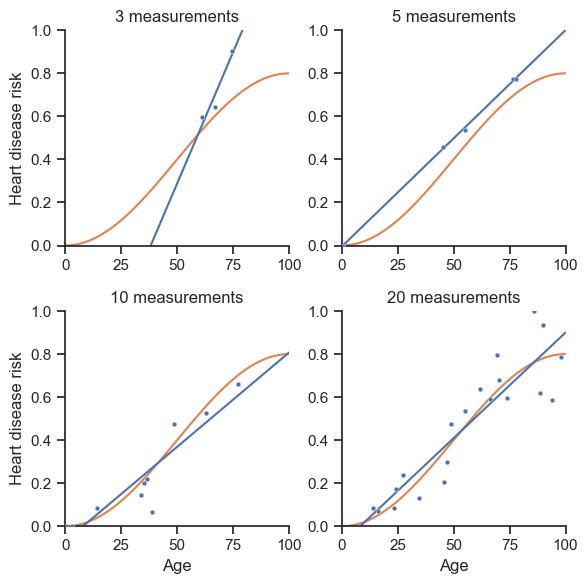

In [242]:
seed = 794
np.random.seed(seed)
print(seed)

sample_ns = [3, 5, 10, 20]
# split dataset into 4 randomly sampled datasets
sample_dfs = []
for n in sample_ns:
  sample_df = plot_df.sample(n=n)
  sample_df['Sample size'] = n
  sample_dfs.append(sample_df)

reg_coefs_per_sample = []
for sample_df in sample_dfs:
  reg_coefs = np.polyfit(sample_df['Age'], sample_df['Heart disease risk'], 1)
  reg_coefs_per_sample.append(reg_coefs)

sample_df = pd.concat(sample_dfs)
# show samplings and linear regression on 2 by 2 grid
g = sns.FacetGrid(sample_df, col='Sample size', col_wrap=2, sharex=False, sharey=False)
g.map(sns.scatterplot, 'Age', 'Heart disease risk', color=colors[0], label='Measurements', s=12, zorder=10)
# plot underlying
for i, ax in enumerate(g.axes):
  ax.plot(xs_all, underlying_f(xs_all), color=colors[1], label='Underlying function')
# plot regression line
for i, ax in enumerate(g.axes):
  reg_coefs = reg_coefs_per_sample[i]
  ax.plot(xs_all, reg_coefs[0] * xs_all + reg_coefs[1], color=colors[0], label='Approximated function')
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 1)

# join x and y labels so they don't repeat
g.set_titles('{col_name} measurements')
sns.despine()

plt.savefig('../images/3/heart_disease_risk_samples.pdf', bbox_inches='tight')


/Users/marinbenc/miniconda3/envs/tutorial/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


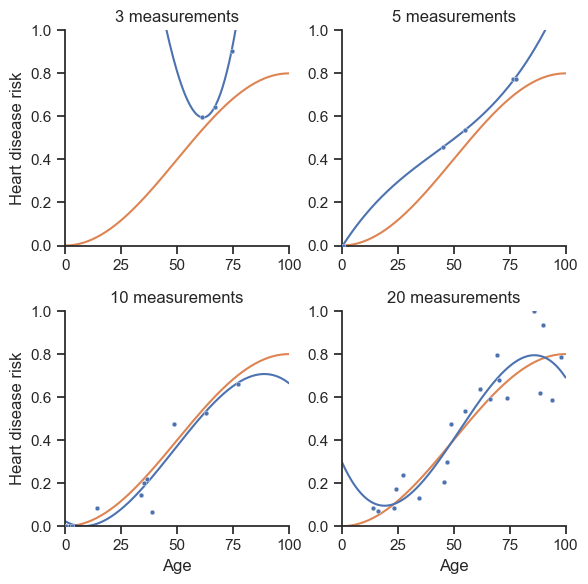

In [243]:
reg_coefs_per_sample = []
for sample_df in sample_dfs:
  reg_coefs = np.polyfit(sample_df['Age'], sample_df['Heart disease risk'], 3)
  reg_coefs_per_sample.append(reg_coefs)

plot_df_2 = pd.concat(sample_dfs)
# show samplings and linear regression on 2 by 2 grid
g = sns.FacetGrid(plot_df_2, col='Sample size', col_wrap=2, sharex=False, sharey=False)
g.map(sns.scatterplot, 'Age', 'Heart disease risk', color=colors[0], label='Measurements', s=12, zorder=10)
# plot underlying
for i, ax in enumerate(g.axes):
  ax.plot(xs_all, underlying_f(xs_all), color=colors[1], label='Underlying function')
# plot regression line
for i, ax in enumerate(g.axes):
  reg_coefs = reg_coefs_per_sample[i]
  ax.plot(xs_all, np.polyval(reg_coefs, xs_all), color=colors[0], label='Approximated function')
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 1)

# join x and y labels so they don't repeat
g.set_titles('{col_name} measurements')
sns.despine()

#plt.savefig('../images/3/heart_disease_risk_samples.pdf', bbox_inches='tight')

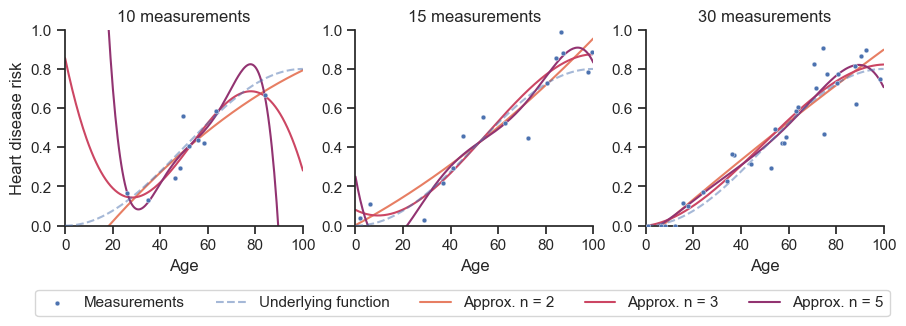

In [304]:
seed = 100
np.random.seed(seed)

sample_ns = [10, 15, 30]
# split dataset into 4 randomly sampled datasets
sample_dfs = []
for n in sample_ns:
  sample_df = plot_df.sample(n=n)
  sample_df['Sample size'] = n
  sample_dfs.append(sample_df)

plot_df_3 = pd.concat(sample_dfs)

degrees = [2, 3, 5]
degree_hues = sns.color_palette("flare", as_cmap=True)(np.linspace(0.2, 0.7, len(degrees)))
reg_coefs_per_sample = []
for sample_df in sample_dfs:
  reg_coefs_per_degree = []
  for degree in degrees:
    reg_coefs = np.polyfit(sample_df['Age'], sample_df['Heart disease risk'], degree)
    reg_coefs_per_degree.append(reg_coefs)
  reg_coefs_per_sample.append(reg_coefs_per_degree)

# show samplings and linear regression on 2 by 2 grid
g = sns.FacetGrid(plot_df_3, col='Sample size', col_wrap=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'Age', 'Heart disease risk', color=colors[0], label='Measurements', s=12, zorder=10)
#plot underlying
for i, ax in enumerate(g.axes):
  ax.plot(xs_all, underlying_f(xs_all), color=colors[0], label='Underlying function', linestyle='--', alpha=0.5, zorder=9)
#plot regression lines, one per degree, on each axis
for i, ax in enumerate(g.axes):
  for j, degree in enumerate(degrees):
    reg_coefs = reg_coefs_per_sample[i][j]
    ax.plot(xs_all, np.polyval(reg_coefs, xs_all), color=degree_hues[j], label=f'Approx. n = {degree}')
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 1)

g.set_titles('{col_name} measurements')

g.axes[1].legend(loc='lower center', bbox_to_anchor=(0.45, -0.5), ncol=5)

plt.savefig('../images/3/heart_disease_risk_samples_degrees.pdf', bbox_inches='tight')